In [33]:
import sys
#Indicate operating environment and import core modules
location_input = input("what computer are you on? a = Bens, b = gpucluster, c = other   ")
location_dict = {'a': "C:\\Users\\heine\\github\\expression_broad_data", 'b': "/home/heineike/github/expression_broad_data",'c':'you need to add your location to the location_dict'}
base_dir = location_dict[location_input]
print("base directory is " + base_dir)

if sys.path[-1] != base_dir:
    sys.path.append(base_dir)
    print("Added " + base_dir + " to path: " )
    print(sys.path)
import os

print("I am about to import a library")
from core import expression_plots 
from core import io_library 
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
#%matplotlib inline
%matplotlib notebook
data_processing_dir = base_dir + os.sep + os.path.normpath("expression_data") + os.sep

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
# from sklearn import linear_model
# import pickle
# import subprocess
# import networkx as nx
# import scipy.stats as stats

import scipy.cluster.hierarchy as sch
#from sklearn.cluster import AgglomerativeClustering

# from Bio import SeqIO
# from Bio import SeqFeature as sf
# from Bio.Alphabet import generic_dna
# from Bio.Seq import Seq

# import re

from collections import Counter
# import scipy.stats as stats
# from itertools import chain
#this only works if you are online
online_input = input("are you online? Yes/No")
if online_input == "Yes": 
    import plotly.plotly as py
    import plotly.graph_objs as pygo
    import plotly.tools as pytools
    py.sign_in('heineike02_student','9dMTMZgJMgUP0YX0P5mQ')
    #py.sign_in('heineike02', 'APPjKrtARaN2ZgUYIkqr')

what computer are you on? a = Bens, b = gpucluster, c = other   a
base directory is C:\Users\heine\github\expression_broad_data
I am about to import a library
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
are you online? Yes/NoYes


# Plot KL LFC alongside KL Expression data from regev. 

In [3]:

# Load KL DE Seq Data
kl_nmpp1_lfc = pd.read_pickle(base_dir + "\expression_data\kl_PKA_as_20160824\LFC_KLac_ASmin_ASplus.pkl")
# drop padj (not used for this analysis)
kl_nmpp1_lfc.drop('padj',axis=1, inplace=True) 



In [16]:
#Reload KL microarry data from Regev lab. 

#had to update growth data file after noticing an error
#only need to do this once
species_list = ['Kluyveromyces lactis', 'Saccharomyces cerevisiae']
fname_out_bases = ['KLac', 'SCer']
base_dir = 'C:\Users\Ben\Documents\GitHub\expression_broad_data'

io_library.make_data_tables(species_list,fname_out_bases, base_dir)

C:\Users\Ben\Documents\GitHub\expression_broad_data\expression_data\raw_exp\KLac_raw_exp.csv saved


core\io_library.py:200: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  expdata = expdata.sort()


All ID's match between experiment data and orf lookup table. Species = Kluyveromyces lactis, Experiment Type = Growth
C:\Users\Ben\Documents\GitHub\expression_broad_data\expression_data\GSE36253_Growth\KLac_growth.csv saved
All ID's match between experiment data and orf lookup table. Species = Kluyveromyces lactis, Experiment Type = Stress
C:\Users\Ben\Documents\GitHub\expression_broad_data\expression_data\GSE38478_Stress\KLac_stress.csv saved
C:\Users\Ben\Documents\GitHub\expression_broad_data\expression_data\raw_exp\SCer_raw_exp.csv saved
All ID's match between experiment data and orf lookup table. Species = Saccharomyces cerevisiae, Experiment Type = Growth
C:\Users\Ben\Documents\GitHub\expression_broad_data\expression_data\GSE36253_Growth\SCer_growth.csv saved
All ID's match between experiment data and orf lookup table. Species = Saccharomyces cerevisiae, Experiment Type = Stress
C:\Users\Ben\Documents\GitHub\expression_broad_data\expression_data\GSE38478_Stress\SCer_stress.csv sav

In [4]:
#Reload KL microarry data from Regev lab. cont
#Import KL ESR data

# This is the regev raw expression
#   1) It might be interesting to plot it v.s. the RNA seq level data (but counts is not gene expression)
#   2) It would be good to integrate the data into the big dataframe
# #Load raw expression data
# species = 'KLac'
# fname = os.path.normpath(base_dir + "\expression_data\\raw_exp\\"  + species + '_raw_exp.csv')
# raw_exp = pd.read_csv(fname, index_col = 'orf_name')
# print fname + ' raw expression dataset loaded'
# #extract mean expression only
# mean_gene_expression = raw_exp['Mean']
# mean_gene_expression.name = 'mean_gene_expression'

#Load data for microarrays
species = 'KLac'

fname = os.path.normpath(base_dir + "\expression_data\\GSE36253_Growth\\"  + species + '_growth.csv' )
growth_exp = pd.read_csv(fname,header = [0,1,2], index_col = [0,1])
print fname + ' growth microarray dataset loaded'

#group by conditions and take mean
growth_replicate_groups = growth_exp.groupby(axis = 1, level = 'conditions')
growth_exp_avg = growth_replicate_groups.aggregate(np.mean)

fname = os.path.normpath(base_dir + "\expression_data\\GSE38478_Stress\\"  + species + '_stress.csv' )
stress_exp = pd.read_csv(fname,header = [0,1,2], index_col = [0,1])
print fname + ' stress microarray dataset loaded'

#group by condition and take mean
stress_replicate_groups = stress_exp.groupby(axis = 1, level = 'conditions')
stress_exp_avg = stress_replicate_groups.aggregate(np.mean)

#combine growth and stress average expression datasets. 
if False in stress_exp_avg.index==growth_exp_avg.index:
    print "Error: ID mismatch between condition data. Species = {}".format(species)
condition_arrays = pd.concat([growth_exp_avg,stress_exp_avg], axis = 1)

#gets rid of ID index
condition_arrays.reset_index(level=0, inplace=True)

C:\Users\Ben\Documents\GitHub\expression_broad_data\expression_data\GSE36253_Growth\KLac_growth.csv growth microarray dataset loaded
C:\Users\Ben\Documents\GitHub\expression_broad_data\expression_data\GSE38478_Stress\KLac_stress.csv stress microarray dataset loaded


In [10]:
#Hsp12 is this: KLLA0D07634g
condition_arrays.loc['KLLA0D07634g']



conditions
ID                       14544.000000
DS/LOG                       6.833094
LAG/LOG                      1.265305
LL/LOG                       4.109909
PLAT/LOG                     4.047119
PS/LOG                       6.456386
NaCl_005                     2.400802
NaCl_015                     0.460518
NaCl_030                     1.342152
NaCl_060                     0.279167
heat shock_005               8.199017
heat shock_015                    NaN
heat shock_030                    NaN
heat shock_045               8.880749
heat shock_060               9.297101
hydrogen peroxide_005        2.764462
hydrogen peroxide_015        5.596948
hydrogen peroxide_030        9.452556
hydrogen peroxide_060        3.368526
Name: KLLA0D07634g, dtype: float64

In [5]:
#Join Regev data to Log fold change from KL PKA inhibition experiment

kl_stress_nmpp1_data = kl_nmpp1_lfc.join(condition_arrays, on = 'orf_name') 
kl_stress_nmpp1_data.drop('ID', axis=1, inplace=True)
kl_stress_nmpp1_data.set_index('orf_name',inplace = True)

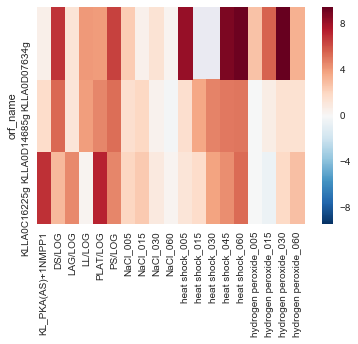

In [7]:
subset = kl_stress_nmpp1_data.loc[['KLLA0D07634g','KLLA0D14685g','KLLA0C16225g']]
sns.heatmap(subset)
#KLLA0C16225g

Hsp12 - middle gene is very low under PKA inhibition in KL, but still heavily induced for heat shock and oxidative stress. 
What other genes are low for PKA inhibition, but high for heat shock? 

In [10]:
kl_stress_nmpp1_data_pka_not_act = kl_stress_nmpp1_data[kl_stress_nmpp1_data['KL_PKA(AS)+1NMPP1']<2.0]
kl_stress_nmpp1_data_pka_not_act_high_heat = kl_stress_nmpp1_data_pka_not_act[kl_stress_nmpp1_data_pka_not_act['heat shock_045']>2.0]
kl_stress_nmpp1_data_pka_not_act_high_heat_sorted = kl_stress_nmpp1_data_pka_not_act_high_heat.sort_values(by='heat shock_045', ascending=False)

In [8]:
#Read in kl_sc_data to see what SC PKA inhibition looks like
kl_sc_PKA_data_motif_hits = pd.read_pickle(base_dir + "\expression_data\kl_PKA_as_20160824\kl_sc_PKA_data_motif_hits")

In [22]:
kl_sc_PKA_data_motif_hits[kl_sc_PKA_data_motif_hits['SC_common_name'].isin(['RPL2A','RPL2B','HSP12','CTT1','SIP18'])].transpose()

,1073,2220,4500,4768,4769
N SCer Orthologs,1,1,2,2,2
kl_genename,KLLA0D07634g,KLLA0D14685g,KLLA0C16225g,KLLA0D16027g,KLLA0D16027g
sc_genename,YFL014W,YGR088W,YMR175W,YFR031C-A,YIL018W
KL_PKA(AS)+1NMPP1,0.581167,1.7331,6.91127,-6.91637,-6.91637
padj,4.34147e-37,5.34357e-190,0,0,0
SC_PKA(AS)+1NMPP1,8.10995,6.86678,7.66036,-5.16534,-4.17221
SC_common_name,HSP12,CTT1,SIP18,RPL2A,RPL2B
kl_msn2_hits,0,0,2,3,3
sc_msn2_hits,7,4,3,4,0
kl_hsf1_hits,1,0,0,0,0


In [11]:
kl_sc_PKA_data_motif_hits[kl_sc_PKA_data_motif_hits['kl_genename'].isin(['KLLA0D07634g','KLLA0D14685g','KLLA0C16225g'])]

,N SCer Orthologs,kl_genename,sc_genename,KL_PKA(AS)+1NMPP1,padj,SC_PKA(AS)+1NMPP1,SC_common_name,kl_msn2_hits,sc_msn2_hits,kl_hsf1_hits,...,kl_hap3_hits,sc_hap3_hits,kl_cat8_hits,sc_cat8_hits,kl_rap1_hits,sc_rap1_hits,kl_AAGGGA_hits,sc_AAGGGA_hits,kl_hac1_hits,sc_hac1_hits
1073,1,KLLA0D07634g,YFL014W,0.581167,4.341468e-37,8.10995,HSP12,0,7,1,...,0,0,0,2,0,1,1,0,0,0
2220,1,KLLA0D14685g,YGR088W,1.733099,5.343571e-190,6.86678,CTT1,0,4,0,...,0,0,0,0,0,0,0,0,0,0
4500,2,KLLA0C16225g,YMR175W,6.911274,0.000000e+00,7.66036,SIP18,2,3,0,...,0,1,0,0,0,0,0,2,0,0
4501,2,KLLA0C16225g,YPL223C,6.911274,0.000000e+00,5.50555,GRE1,2,0,0,...,0,0,0,0,0,1,0,4,0,0


In [17]:
#set(list(kl_stress_nmpp1_data_pka_not_act_high_heat_sorted.index))
kl_sc_PKA_data_low_klPKA_high_klHeat = kl_sc_PKA_data_motif_hits[kl_sc_PKA_data_motif_hits['kl_genename'].isin(kl_stress_nmpp1_data_pka_not_act_high_heat_sorted.index)]
kl_sc_PKA_data_low_klPKA_high_klHeat.sort_values(by = 'SC_PKA(AS)+1NMPP1',ascending=False)

,N SCer Orthologs,kl_genename,sc_genename,KL_PKA(AS)+1NMPP1,padj,SC_PKA(AS)+1NMPP1,SC_common_name,kl_msn2_hits,sc_msn2_hits,kl_hsf1_hits,...,kl_hap3_hits,sc_hap3_hits,kl_cat8_hits,sc_cat8_hits,kl_rap1_hits,sc_rap1_hits,kl_AAGGGA_hits,sc_AAGGGA_hits,kl_hac1_hits,sc_hac1_hits
1073,1,KLLA0D07634g,YFL014W,0.581167,4.341468e-37,8.109950,HSP12,0,7,1,...,0,0,0,2,0,1,1,0,0,0
2220,1,KLLA0D14685g,YGR088W,1.733099,5.343571e-190,6.866780,CTT1,0,4,0,...,0,0,0,0,0,0,0,0,0,0
2607,1,KLLA0F00528g,YAL061W,1.872165,1.209971e-162,3.948590,BDH2,1,3,0,...,0,2,0,0,0,0,0,1,0,0
399,1,KLLA0F06226g,YML004C,1.411776,8.115291e-184,3.092360,GLO1,1,2,0,...,1,0,0,0,0,0,1,1,0,0
3618,1,KLLA0B11880g,YIR017C,1.792734,4.371209e-115,2.858100,MET28,2,1,0,...,0,0,0,0,0,0,0,0,0,1
1758,1,KLLA0F05775g,YDL124W,1.962376,9.963739e-143,2.714280,YDL124W,1,2,0,...,0,0,0,1,1,0,1,0,0,1
2167,1,KLLA0F20009g,YLR109W,1.753788,0.000000e+00,2.581580,AHP1,1,3,0,...,1,0,0,1,0,0,0,2,0,0
1615,1,KLLA0F13574g,YKL103C,1.633552,1.268377e-123,2.542640,APE1,2,2,0,...,0,0,0,0,0,0,0,1,0,0
1841,1,KLLA0F01881g,YJL066C,1.070835,7.937278e-55,2.322330,MPM1,0,2,0,...,0,0,1,0,0,0,0,0,0,0
3002,1,KLLA0A07535g,YOL110W,1.456494,3.605030e-15,2.257130,SHR5,0,1,0,...,0,0,0,1,0,0,2,0,0,0


In [23]:
condition_arrays_SC.loc[['YGR088W','YFL014W','YMR175W']]

conditions,ID,DS/LOG,LAG/LOG,LL/LOG,PLAT/LOG,PS/LOG,NaCl_005,NaCl_015,NaCl_030,NaCl_060,heat shock_005,heat shock_015,heat shock_030,heat shock_045,heat shock_060,hydrogen peroxide_005,hydrogen peroxide_015,hydrogen peroxide_030,hydrogen peroxide_060
orf_name,,,,,,,,,,,,,,,,,,,
YGR088W,A_06_P3308,6.725258,0.966313,2.525097,7.817688,9.063755,6.758664,9.321750,8.630686,6.919316,5.617417,7.308456,4.550260,6.244503,2.015708,-0.062414,-0.024651,2.965997,2.489211
YFL014W,A_06_P2839,7.896686,2.915504,0.846873,10.702357,11.416275,0.047152,13.212663,13.287712,9.323696,10.046851,9.544164,12.395761,10.483180,NaN,4.469798,1.447357,2.559604,1.328499
YMR175W,A_06_P5612,4.555804,3.693164,0.228108,10.636373,10.004353,0.686061,7.402295,8.088970,7.464446,0.000000,2.379034,3.592418,2.469237,1.023898,-0.250017,-0.007817,0.067477,0.797742


[6, 7, 0, 10, 11, 12, 13, 14, 3, 4, 1, 5, 15, 18, 16, 17, 2, 8, 9]
[0, 3, 4, 1, 5, 11, 12, 13, 14, 6, 7, 18, 17, 16, 15, 8, 9, 2]


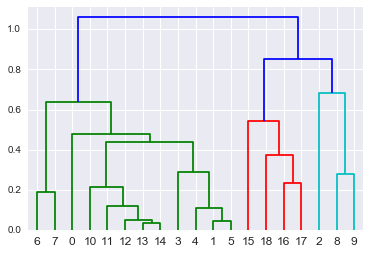

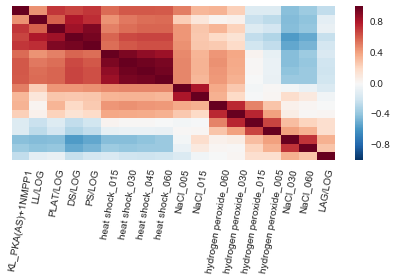

In [19]:
#Correlation heatmap with all conditions v.s. PKA inhibition. 

#First do heirarchical clustering of conditions, then reorder matrix. 
kl_stress_nmpp1_data_nanrm = kl_stress_nmpp1_data.fillna(0.0)
kl_stress_nmpp1_data_transpose = kl_stress_nmpp1_data_nanrm.as_matrix().transpose()
col_cluster = sch.linkage(kl_stress_nmpp1_data_transpose, method='average', metric = 'correlation')
col_dend = sch.dendrogram(col_cluster)
col_ind_reorder = col_dend['leaves']
#new columns look almost right but need to flip the tree around.  
print col_ind_reorder
col_ind_reorder_pretty = [0,3,4,1,5,11,12,13,14,6,7,18,17,16,15,8,9,2]
print col_ind_reorder_pretty

# col_ind_reorder_branch_flip ={16 : 19, 19: 18, 18:16}
# col_ind_reorder_pretty = col_ind_reorder[:]  #Need to use slice because otherwise the two lists are linked.  This makes a copy
# for key in col_ind_reorder_branch_flip.keys():
#     ind_ind = col_ind_reorder.index(key)
#     col_ind_reorder_pretty[ind_ind] = col_ind_reorder_branch_flip[key]

old_cols = kl_stress_nmpp1_data.columns.tolist()
new_cols = [old_cols[ind] for ind in col_ind_reorder_pretty]



kl_stress_nmpp1_data_col_reorder = kl_stress_nmpp1_data[new_cols]

#Plot correlation Matrix
#corr = kl_stress_nmpp1_data.corr()
corr = kl_stress_nmpp1_data_col_reorder.corr()
fig2, ax = plt.subplots()
ax = sns.heatmap(corr)
ax.tick_params(axis='y',labelleft = 'off')
plt.setp(ax.get_xticklabels(), rotation = 80)
plt.tight_layout()
plt.savefig('C:\Users\Ben\Google Drive\UCSF\ElSamad_Lab\Lab Meeting\\20161118\KL_corr.png')
#Clean up labels


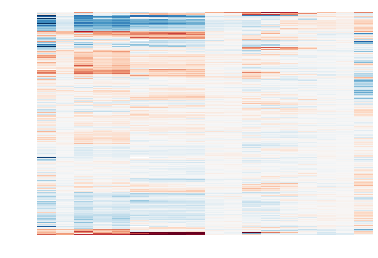

In [26]:
#Heirarchical cluster of genes with columns ordered as above to visualise ESR genes. 

#First filter out items with mostly NA values. 
kl_stress_nmpp1_data_filt = kl_stress_nmpp1_data_col_reorder.dropna(thresh=(len(kl_stress_nmpp1_data_col_reorder.columns)-1))

#Drop out PKA column for clustering
kl_stress_data = kl_stress_nmpp1_data_filt.drop('KL_PKA(AS)+1NMPP1', axis = 1)

kl_stress_data_nafill = kl_stress_data.fillna(0.0)
kl_stress_data_mat = kl_stress_data_nafill.as_matrix()

#fig3, ax_cm = plt.subplots()
#ax_cm = sns.clustermap(kl_stress_data_col_reorder_nafill,colcluster = False)
#ax_cm.ax_heatmap.tick_params(labelleft = 'off')

row_cluster = sch.linkage(kl_stress_data_mat, method='average')
row_ind_reorder = sch.leaves_list(row_cluster)

old_rows = kl_stress_nmpp1_data_filt.index.tolist()
new_rows = [old_rows[ind] for ind in row_ind_reorder]

kl_stress_nmpp1_data_filt_reorder = kl_stress_nmpp1_data_filt.reindex(new_rows)

fig3, ax3 = plt.subplots()
#ax3= sns.heatmap(kl_stress_nmpp1_data_filt_reorder)
# ax3 = plt.imshow(kl_stress_nmpp1_data_filt_reorder.as_matrix(), cmap='RdBu', vmin=z_min, vmax=z_max,
#            extent=[x.min(), x.max(), y.min(), y.max()],
#            interpolation='nearest', origin='lower')
ax3 = plt.imshow(-kl_stress_nmpp1_data_filt_reorder.as_matrix(), interpolation="nearest", aspect = 'auto', cmap = 'RdBu',vmin = -6, vmax = 6)
plt.axis('off')
plt.savefig('C:\Users\Ben\Google Drive\UCSF\ElSamad_Lab\Lab Meeting\\20161118\KL_genes.png')


# SC PKA inhibition data alongside SC Expression data from regev ordering the columns as determined by KL clustering above. 

In [12]:
#Load oshea PKA inhibition data

oshea_SC_PKA_data = io_library.load_oshea_NMPP1_data()


In [5]:
#Import Regev data for SCer
#Load data for microarrays
species = 'SCer'

fname = os.path.normpath(data_processing_dir + "GSE36253_Growth\\"  + species + '_growth.csv' )
growth_exp = pd.read_csv(fname,header = [0,1,2], index_col = [0,1])
print(fname + ' growth microarray dataset loaded')

#group by conditions and take mean
growth_replicate_groups = growth_exp.groupby(axis = 1, level = 'conditions')
growth_exp_avg = growth_replicate_groups.aggregate(np.mean)

fname = os.path.normpath(data_processing_dir + "GSE38478_Stress\\"  + species + '_stress.csv' )
stress_exp = pd.read_csv(fname,header = [0,1,2], index_col = [0,1])
print(fname + ' stress microarray dataset loaded')

#group by condition and take mean
stress_replicate_groups = stress_exp.groupby(axis = 1, level = 'conditions')
stress_exp_avg = stress_replicate_groups.aggregate(np.mean)

#combine growth and stress average expression datasets. 
if False in stress_exp_avg.index==growth_exp_avg.index:
    print("Error: ID mismatch between condition data. Species = {}".format(species))
condition_arrays_SC = pd.concat([growth_exp_avg,stress_exp_avg], axis = 1)

#gets rid of ID index
condition_arrays_SC.reset_index(level=0, inplace=True)


C:\Users\heine\github\expression_broad_data\expression_data\GSE36253_Growth\SCer_growth.csv growth microarray dataset loaded
C:\Users\heine\github\expression_broad_data\expression_data\GSE38478_Stress\SCer_stress.csv stress microarray dataset loaded


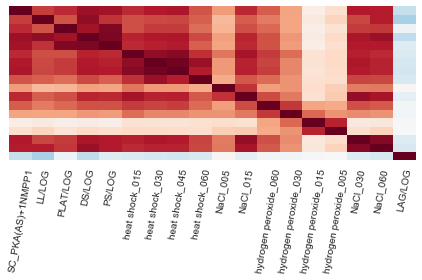

In [20]:
#Using same condition ordering as in KL dataset, look at SCer condition clustering. 

#Merge NMPP1 and Condition Data
sc_stress_nmpp1_data = pd.merge(oshea_SC_PKA_data, condition_arrays_SC, how='inner', left_index=True, right_index=True)
sc_stress_nmpp1_data.drop(['ID', 'SC_common_name'], axis=1, inplace=True)

#Reorder columns 
old_cols = sc_stress_nmpp1_data.columns.tolist()
new_cols = [old_cols[ind] for ind in col_ind_reorder_pretty]

sc_stress_nmpp1_data_col_reorder = sc_stress_nmpp1_data[new_cols]

#Plot correlation Matrix
corr = sc_stress_nmpp1_data_col_reorder.corr()
fig2, ax = plt.subplots()
ax = sns.heatmap(corr, cbar = False)
ax.tick_params(axis='y',labelleft = 'off')
plt.setp(ax.get_xticklabels(), rotation = 80)
plt.tight_layout()
plt.savefig('C:\Users\Ben\Google Drive\UCSF\ElSamad_Lab\Lab Meeting\\20161118\SC_corr.png')


In [23]:
#Cleans up SC NMPP1/Stress data to cluster genes

#Filter out columns that have mostly NA values. 
sc_stress_nmpp1_data_filt = sc_stress_nmpp1_data_col_reorder.dropna(thresh=(len(sc_stress_nmpp1_data_col_reorder.columns)-1))

#Combine rows that have duplicate values. 
gene_names = sc_stress_nmpp1_data_filt.index.tolist()
print len(gene_names)
print len(set(gene_names))

#This shows you which genes have duplicates 
# frequency = Counter(gene_names)
# frequency.most_common()[:20]

#Builds a dictionary that gives index values in the original dataframe for each genename 
gene_names_to_inds = defaultdict(list)
for ind, value in enumerate(gene_names):
    gene_names_to_inds[value].append(ind)

# gene_names_to_inds['YNR077C']

# #Build new dataframe, averaging duplicate indices
sc_stress_nmpp1_data_consolidated_list = []
col_names = sc_stress_nmpp1_data_filt.columns
Ncols = len(col_names)
for gene_name, inds in gene_names_to_inds.iteritems():
    if len(inds) == 1:
        sc_stress_nmpp1_data_consolidated_list.append((gene_name,sc_stress_nmpp1_data_filt.iloc[inds[0],:]))
    else: 
        exp_values_no_zeros = []
        repeat_data = sc_stress_nmpp1_data_filt.iloc[inds]
        for col_name in col_names:
            exp_values_no_zeros.append([val for val in repeat_data[col_name] if val !=0])

        exp_values_avg = []
        for val in exp_values_no_zeros:
            if len(val)==0:
                exp_values_avg.append(0.0)
            else:
                exp_values_avg.append(np.mean(val))
        
        exp_values_avg_series = pd.Series(exp_values_avg, index =col_names)
        sc_stress_nmpp1_data_consolidated_list.append((gene_name,exp_values_avg_series))

sc_stress_nmpp1_data_consolidated = pd.DataFrame.from_items(sc_stress_nmpp1_data_consolidated_list , orient='index', columns=col_names)


6212
6184


clustering
plotting


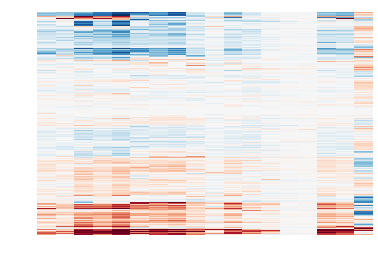

In [25]:
#Heirarchical cluster of genes with columns ordered as above to visualise ESR genes.

#drop out AS data for clustering
sc_stress_data = sc_stress_nmpp1_data_consolidated.drop(['SC_PKA(AS)+1NMPP1'], axis = 1)

sc_stress_data_nafill = sc_stress_data.fillna(0.0)
sc_stress_data_mat = sc_stress_data_nafill.as_matrix()

print 'clustering'
row_cluster = sch.linkage(sc_stress_data_mat, method='average')
row_ind_reorder = sch.leaves_list(row_cluster)

old_rows = sc_stress_nmpp1_data_consolidated.index.tolist()
new_rows = [old_rows[ind] for ind in row_ind_reorder]

sc_stress_nmpp1_data_reorder = sc_stress_nmpp1_data_consolidated.reindex(new_rows)

print 'plotting'
fig3, ax3 = plt.subplots()
#ax3= sns.heatmap(kl_stress_nmpp1_data_filt_reorder)
# ax3 = plt.imshow(kl_stress_nmpp1_data_filt_reorder.as_matrix(), cmap='RdBu', vmin=z_min, vmax=z_max,
#            extent=[x.min(), x.max(), y.min(), y.max()],
#            interpolation='nearest', origin='lower')
ax3 = plt.imshow(-sc_stress_nmpp1_data_reorder.as_matrix(), interpolation="nearest", aspect = 'auto', cmap = 'RdBu',vmin = -6, vmax = 6)
plt.axis('off')
plt.savefig('C:\Users\Ben\Google Drive\UCSF\ElSamad_Lab\Lab Meeting\\20161118\SC_genes.png')


# GOIs in regev data

In [18]:
#First load SC condition data (see above)
condition_names = condition_arrays_SC.columns[1:]

In [51]:
#Load goi_data
goi_data = pd.read_csv(data_processing_dir + os.path.normpath('20170817_klscpka/goi_data.csv'), index_col=0)
goi_data

,SC_common_name,sc_genename,log2FoldChange_SC,raw_AS_noNMPP1_YPD_t40_mean_SC,raw_AS_yesNMPP1_YPD_t40_mean_SC,kl_genename,log2FoldChange_KL,raw_AS_noNMPP1_YPD_t40_mean_KL,raw_AS_yesNMPP1_YPD_t40_mean_KL,category
3966,NTH2,YBR001C,2.869520,2.136703,3.128899,KLLA0E17271g,2.100226,3.049119,3.840772,metabolic
3967,NTH1,YDR001C,2.815195,1.265725,2.226595,KLLA0E17271g,2.100226,3.049119,3.840772,metabolic
3968,GLK1,YCL040W,4.160390,1.791886,3.224448,KLLA0C01155g,2.178913,2.557021,3.350059,metabolic
3969,EMI2,YDR516C,2.464130,3.271367,4.148126,KLLA0C01155g,2.178913,2.557021,3.350059,metabolic
3972,SKT5,YBL061C,-1.806729,2.460149,2.056057,KLLA0E20263g,-0.380750,2.462343,2.466842,metabolic
3973,SHC1,YER096W,3.793451,1.471903,2.754438,KLLA0E20263g,-0.380750,2.462343,2.466842,metabolic
3978,GND2,YGR256W,7.143522,1.412570,3.676099,KLLA0A09339g,0.394234,3.570254,3.789341,metabolic
3979,GND1,YHR183W,-1.190240,2.855015,2.639284,KLLA0A09339g,0.394234,3.570254,3.789341,metabolic
3994,LPD1,YFL018C,1.016738,3.100750,3.545507,KLLA0D11154g,-0.817035,2.686856,2.538857,metabolic
3995,IRC15,YPL017C,3.049381,0.638741,1.593980,KLLA0D11154g,-0.817035,2.686856,2.538857,metabolic


In [52]:
goi_data_SC_arrays = pd.merge(goi_data,condition_arrays_SC, left_on='sc_genename',right_index = True, how = 'left')


# fig3, ax3 = plt.subplots()
# #ax3= sns.heatmap(kl_stress_nmpp1_data_filt_reorder)
# # ax3 = plt.imshow(kl_stress_nmpp1_data_filt_reorder.as_matrix(), cmap='RdBu', vmin=z_min, vmax=z_max,
# #            extent=[x.min(), x.max(), y.min(), y.max()],
# #            interpolation='nearest', origin='lower')
# ax3 = plt.imshow(-sc_stress_nmpp1_data_reorder.as_matrix(), interpolation="nearest", aspect = 'auto', cmap = 'RdBu',vmin = -6, vmax = 6)

# sns.heatmap(corr)


In [64]:
goi_data_SC_arrays[goi_data_SC_arrays['SC_common_name'].isin(['CIT1','CIT2','YHR033W','PRO1'])]

,SC_common_name,sc_genename,log2FoldChange_SC,raw_AS_noNMPP1_YPD_t40_mean_SC,raw_AS_yesNMPP1_YPD_t40_mean_SC,kl_genename,log2FoldChange_KL,raw_AS_noNMPP1_YPD_t40_mean_KL,raw_AS_yesNMPP1_YPD_t40_mean_KL,category,...,NaCl_060,heat shock_005,heat shock_015,heat shock_030,heat shock_045,heat shock_060,hydrogen peroxide_005,hydrogen peroxide_015,hydrogen peroxide_030,hydrogen peroxide_060
4364,CIT2,YCR005C,-2.464709,2.127879,1.524889,KLLA0F12760g,0.581082,1.966862,2.261104,metabolic,...,0.067841,1.600056,2.890930,-0.725532,0.100272,-1.477646,-0.151265,-0.558669,1.435718,0.898509
4365,CIT1,YNR001C,2.403591,1.737902,2.627134,KLLA0F12760g,0.581082,1.966862,2.261104,metabolic,...,2.537716,1.986048,3.683551,2.983019,3.879069,1.434727,0.252256,0.121861,1.179648,1.919018
4780,PRO1,YDR300C,-5.167378,2.381026,1.009593,KLLA0C10296g,-1.249849,2.798976,2.510343,metabolic,...,-1.609407,-0.300475,-1.989919,-1.494370,-2.168474,-0.165783,-0.047591,-0.004693,-0.125193,-1.045169
4781,YHR033W,YHR033W,0.487044,2.029217,2.303109,KLLA0C10296g,-1.249849,2.798976,2.510343,metabolic,...,7.483065,2.716356,4.297017,2.255776,4.026759,0.393423,0.158055,0.147141,-0.255230,1.833584


In [63]:
#Visualize with a heatmap
goi_data_SC_arrays_sorted = goi_data_SC_arrays.sort_values(by='log2FoldChange_SC')
gene_labels = goi_data_SC_arrays_sorted['SC_common_name']
fc_values = goi_data_SC_arrays_sorted.loc[:,['log2FoldChange_SC'] + list(condition_names) ]



trace = pygo.Heatmap(z = np.array(fc_values),
                   x= list(fc_values.columns),
                   y= list(gene_labels)
                   )

# trace2 = pygo.Heatmap(z = np.array(joint_topology_values).transpose(),
#                    text = np.array(joint_topology_text).transpose(),
#                    x=joint_topology_column_labels,
#                    y= gene_labels, 
#                    hoverinfo = 'x+y+text',
#                    colorscale = 'Electric',
#                    showscale = False)

# trace3 = pygo.Heatmap(z = np.array(topology_values).transpose(),
#                       text = np.array(topology_text).transpose(),
#                    x=topology_column_labels,
#                    y= gene_labels,
#                    colorscale = 'Blackbody',
#                    hoverinfo = 'x+y+text',
#                    showscale = False)


# fig = pytools.make_subplots(rows=1, cols=3)

# fig.append_trace(trace1, 1, 1)
# fig.append_trace(trace2, 1, 2)
# fig.append_trace(trace3, 1, 3)

# #fig['layout'].update(height=600, width=600, title='i <3 subplots')

# # layout = pygo.Layout(
# #     yaxis = {'title': 'Low Paralog / High Paralog'}
# # )


py.iplot([trace], filename='goi_heatmap')